# PyTorch Tests

In [1]:
from _imports import *
from utils import Euler2fixedpt
from ssn_2dtopoV1 import SSN2DTopoV1, _SSN_Base
from params import GridParameters

In [2]:
grid_pars = GridParameters(
    gridsize_Nx=17,  # Number of grid points in one dimension
    gridsize_deg=3.2,  # Size of the grid in degrees of visual angle
    magnif_factor=2,  # Magnification factor to convert degrees to mm
    hyper_col=800,  # Hypercolumn
)

psi = torch.tensor(0.774)
# Define connection parameters for PyTorch
conn_pars = {
    'J_2x2': torch.tensor([[1.124, -0.931], [1.049, -0.537]],dtype=torch.float64) *torch.pi * psi, 
    's_2x2': torch.tensor([[0.2955, 0.09], [0.5542, 0.09]]),  
    'p_local': [0.72,0.7],  
    'sigma_oris': 45,  
}

# Define other parameters
n = 2  
k = 0.04
tauE = 20 # Time constant for excitatory neurons
tauI = 10  # Time constant for inhibitory neurons

In [3]:
ssn_2d_topo = SSN2DTopoV1(n=n, k=k, tauE=tauE, tauI=tauI, grid_pars=grid_pars, conn_pars=conn_pars)


/Users/khushu/opt/anaconda3/lib/python3.8/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1695391836761/work/aten/src/ATen/native/TensorShape.cpp:3527.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Type of r: torch.float64
Type of inp_vec: torch.float64
Type of self.W: torch.float64
Type of self.tau_vec: torch.float64
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Type of r: torch.float64
Type of inp_vec: torch.float64
Type of self.W: torch.float64
Type of self.tau_vec: torch.float64
Type of r: torch.float64
Type of inp_vec: torch.float64
Type of self.W: torch.float64
Type of self.tau_vec: torch.float64
Type of r: torch.float64
Type of inp_vec: torch.float64
Type of self.W: torch.float64
Type of self.tau_vec: torch.float64
Type of r: torch.float64
Type of inp_vec: torch.float64
Type of self.W: torch.float64
Type of self.tau_vec: torch.float64
Type of r: torch.float64
Type of inp_vec: torch.float64
Type of self.W: torch.float64
Type of self.tau_vec: torch.float64
Type of r: torch.f

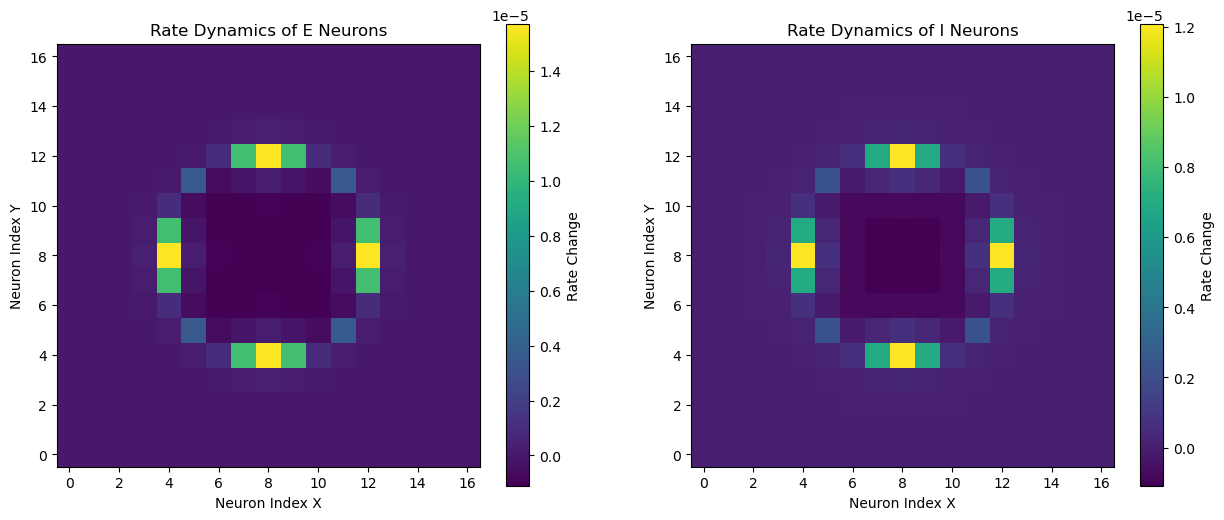

In [4]:
torch.set_default_dtype(torch.float64)

# Creating a simple stimulus for the simulation
contrast = 50
radius = 0.75
orientation = 0

input_pars = {
    'gE': 0.481,
    'gI': 0.226,
    'sig_ori_EF': 32,
    'sig_ori_IF': 32,
    'sigma_RF': 0.04
}

# Grating stimulus
inp_vec_grating = ssn_2d_topo.make_grating_input(radius, ori_s=orientation, contrast=contrast,**input_pars)

# Find the network's fixed point response to the grating stimulus
r_fp_grating, CONVG_grating = ssn_2d_topo.fixed_point_r(inp_vec_grating,verbose=False)

# Rate dynamics
r_dyn = ssn_2d_topo.drdt(r_fp_grating, inp_vec_grating)

E_map, I_map = ssn_2d_topo.vec2map(r_dyn)

# Plot for E neurons
plt.figure(figsize=(15, 6))

plt.subplot(1,2,1)
plt.imshow(E_map.cpu().detach().numpy(), cmap='viridis')  
cbar = plt.colorbar()
cbar.set_label('Rate Change')
plt.title("Rate Dynamics of E Neurons")
plt.xlabel("Neuron Index X")
plt.ylabel("Neuron Index Y")
plt.gca().invert_yaxis()

# Plot for I neurons
plt.subplot(1,2,2)
plt.imshow(I_map.cpu().detach().numpy(), cmap='viridis')  
cbar = plt.colorbar()
cbar.set_label('Rate Change')
plt.title("Rate Dynamics of I Neurons")
plt.xlabel("Neuron Index X")
plt.ylabel("Neuron Index Y")
plt.gca().invert_yaxis()
plt.show()

In [5]:
W = ssn_2d_topo.make_W(**conn_pars)
W_np = W.detach().cpu().numpy()  # Convert PyTorch tensor to NumPy array

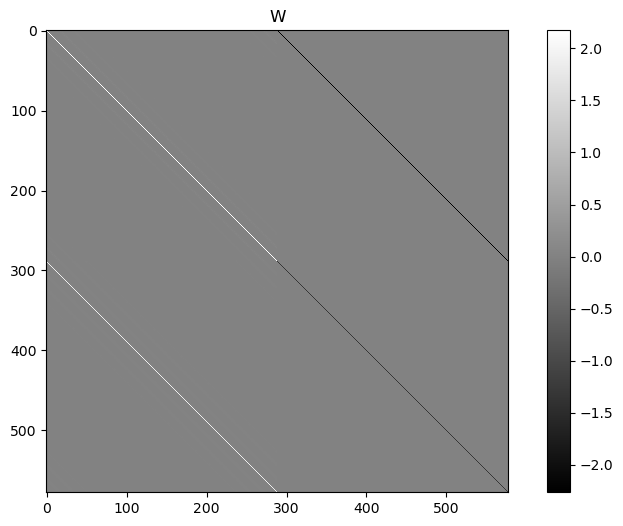

In [6]:
plt.imshow(W_np, cmap='gray', interpolation='nearest')
plt.title('W')
plt.colorbar()
plt.show()

Type of r: torch.float64
Type of inp_vec: torch.float64
Type of self.W: torch.float64
Type of self.tau_vec: torch.float64
Type of r: torch.float64
Type of inp_vec: torch.float64
Type of self.W: torch.float64
Type of self.tau_vec: torch.float64
Type of r: torch.float64
Type of inp_vec: torch.float64
Type of self.W: torch.float64
Type of self.tau_vec: torch.float64
Type of r: torch.float64
Type of inp_vec: torch.float64
Type of self.W: torch.float64
Type of self.tau_vec: torch.float64
Type of r: torch.float64
Type of inp_vec: torch.float64
Type of self.W: torch.float64
Type of self.tau_vec: torch.float64
Type of r: torch.float64
Type of inp_vec: torch.float64
Type of self.W: torch.float64
Type of self.tau_vec: torch.float64
Type of r: torch.float64
Type of inp_vec: torch.float64
Type of self.W: torch.float64
Type of self.tau_vec: torch.float64
Type of r: torch.float64
Type of inp_vec: torch.float64
Type of self.W: torch.float64
Type of self.tau_vec: torch.float64
Type of r: torch.float64

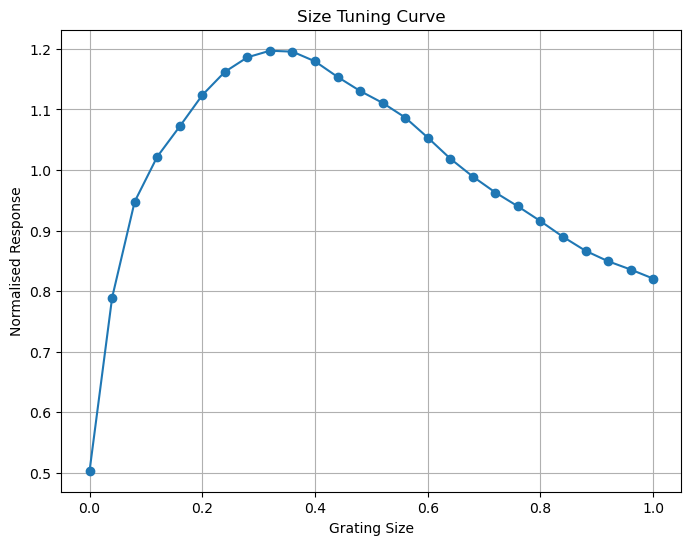

In [7]:
# Define the grid size and identify the central neuron
central_neuron_idx = ssn_2d_topo.center_inds[0]

# Define different sizes for the grating stimuli
sizes = torch.arange(0, 1.01, 0.04) 
responses = []

for size in sizes:
    # Generate grating stimulus for each size
    inp_vec_grating = ssn_2d_topo.make_grating_input(size.item(), ori_s=orientation, contrast=contrast,**input_pars)

    # Compute the fixed point response
    r_fp_grating, _ = ssn_2d_topo.fixed_point_r(inp_vec_grating,verbose=False)

    # Extract the response of the central neuron
    central_neuron_response = r_fp_grating[central_neuron_idx]
    responses.append(central_neuron_response)

responses = torch.tensor(responses)  # Convert list to tensor
responses /= torch.mean(responses)

#plot without normalisation 


# Plot the size tuning curve
plt.figure(figsize=(8, 6))
plt.plot(sizes.numpy(), responses.numpy(), marker='o')  # Convert tensors to NumPy arrays for plotting
plt.xlabel('Grating Size')
plt.ylabel('Normalised Response')
plt.title('Size Tuning Curve')
plt.grid(True)
plt.show()

# NUMPY tests

In [8]:
from SSN_numpy import _SSN_Base, SSN2DTopoV1, Euler2fixedpt


In [9]:
# Connection parameters for NumPy
conn_pars_numpy = {
    'J_2x2': np.array([[1.124, -0.931], [1.049, -0.537]]) *np.pi * psi.numpy(), 
    's_2x2': np.array([[0.2955, 0.09], [0.5542, 0.09]]),  
    'p_local': [0.72,0.7],
    'sigma_oris': 45
}

In [10]:
ssn_numpy = SSN2DTopoV1(n=n, k=k, tauE=tauE, tauI=tauI, grid_pars=grid_pars,  conn_pars=conn_pars_numpy)

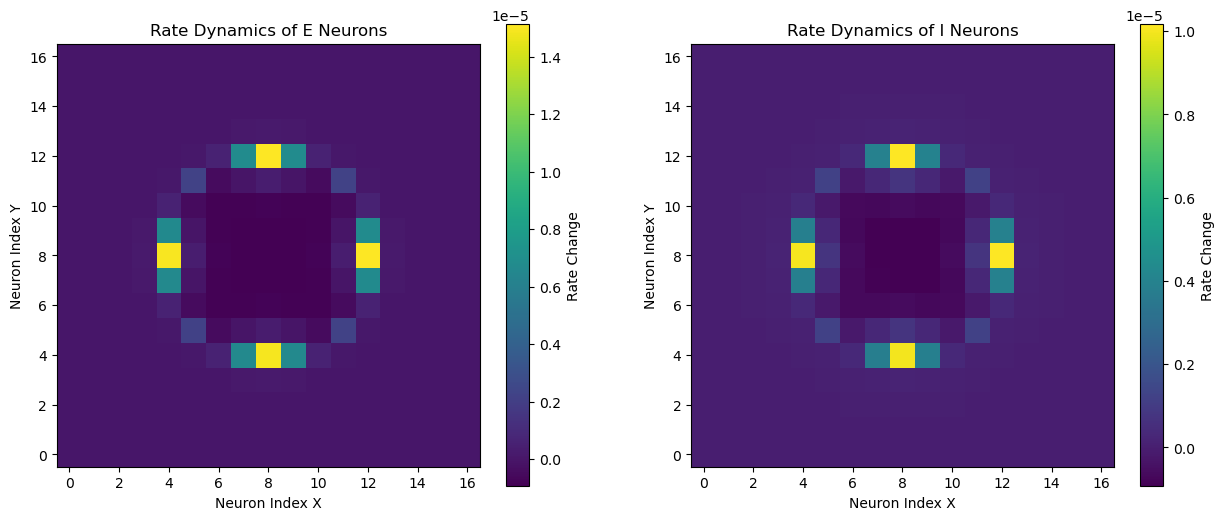

In [11]:
# Creating the same stimulus as in PyTorch
inp_vec_grating_numpy = ssn_numpy.make_grating_input(radius, ori_s=orientation, contrast=contrast,**input_pars)

# Find the network's fixed point response to the grating stimulus (NumPy)
r_fp_grating_numpy, CONVG_grating_numpy = ssn_numpy.fixed_point_r(inp_vec_grating_numpy)

# Rate dynamics analysis (NumPy)
r_dyn_numpy = ssn_numpy.drdt(r_fp_grating_numpy, inp_vec_grating_numpy)

# Use the vec2map method to convert the rate dynamics into 2D maps for E and I neurons
E_map_numpy, I_map_numpy = ssn_numpy.vec2map(r_dyn_numpy)

# Plot for E neurons
plt.figure(figsize=(15, 6))

plt.subplot(1,2,1)
plt.imshow(E_map_numpy, cmap='viridis')
cbar = plt.colorbar()
cbar.set_label('Rate Change')
plt.title("Rate Dynamics of E Neurons")
plt.xlabel("Neuron Index X")
plt.ylabel("Neuron Index Y")
plt.gca().invert_yaxis()

# Plot for I neurons
plt.subplot(1,2,2)
plt.imshow(I_map_numpy, cmap='viridis')
cbar = plt.colorbar()
cbar.set_label('Rate Change')
plt.title("Rate Dynamics of I Neurons")
plt.xlabel("Neuron Index X")
plt.ylabel("Neuron Index Y")
plt.gca().invert_yaxis()
plt.show()

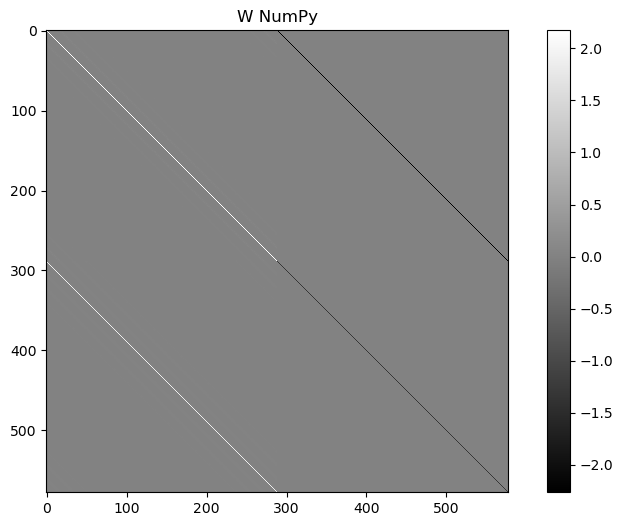

In [12]:
W_numpy = ssn_numpy.make_W(**conn_pars_numpy)
plt.imshow(W_numpy, cmap='gray', interpolation='nearest')
plt.title('W NumPy')
plt.colorbar()

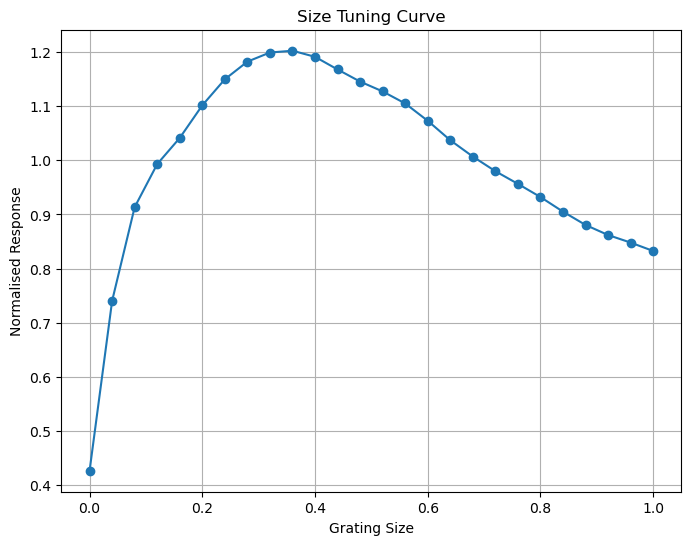

In [13]:
# identify the central neuron
central_neuron_idx = ssn_numpy.center_inds[0]

# Define different sizes for the grating stimuli
sizes = np.arange(0, 1.01, 0.04)
responses_np = []

for size in sizes:
    # Generate grating stimulus for each size
    inp_vec_grating = ssn_numpy.make_grating_input(size, ori_s=orientation, contrast=contrast,**input_pars)

    # Compute the fixed point response
    r_fp_grating, _ = ssn_numpy.fixed_point_r(inp_vec_grating, verbose=False)

    # Extract the response of the central neuron
    central_neuron_response = r_fp_grating[central_neuron_idx]
    responses_np.append(central_neuron_response)

responses_np = np.array(responses_np) 
responses_np /= np.mean(responses_np)

# Plot the size tuning curve
plt.figure(figsize=(8, 6))
plt.plot(sizes, responses_np, marker='o')
plt.xlabel('Grating Size')
plt.ylabel('Normalised Response')
plt.title('Size Tuning Curve')
plt.grid(True)
plt.show()


# COMPARISON

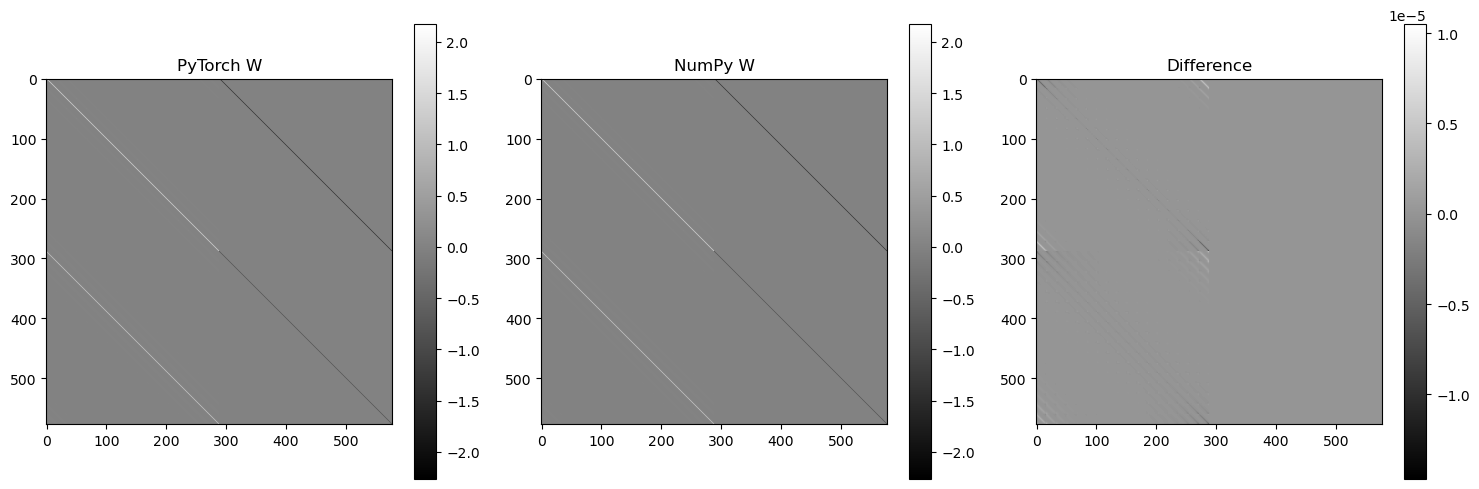

In [14]:
# Compute the difference
difference = W_np - W_numpy

# Plot the matrices
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(W_np, cmap='gray')
plt.title('PyTorch W')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.imshow(W_numpy, cmap='gray')
plt.title('NumPy W')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.imshow(difference, cmap='gray')
plt.title('Difference')
plt.colorbar()

plt.tight_layout()
plt.show()

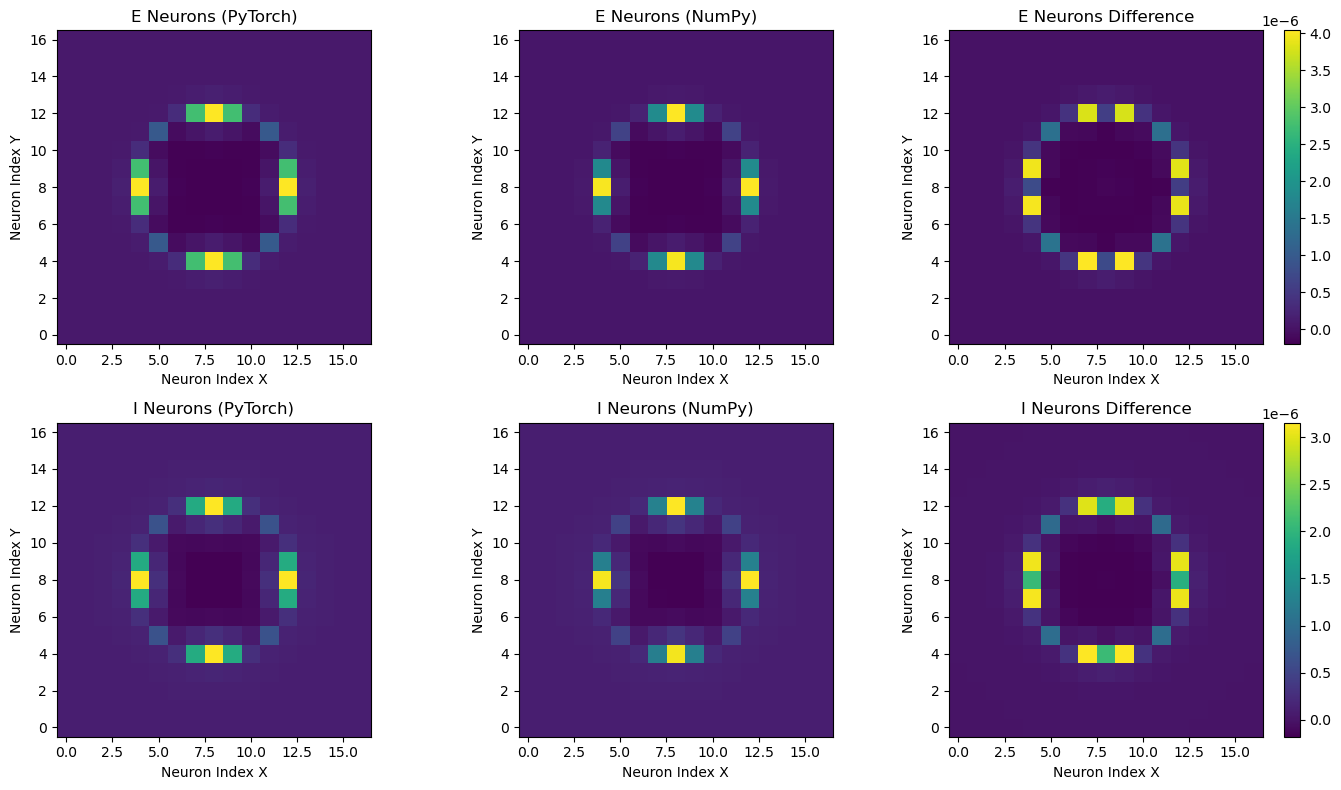

In [15]:
# Calculate differences
E_diff = E_map - E_map_numpy
I_diff = I_map - I_map_numpy

# Function to plot a map
def plot_map(data, title, ax, add_colorbar=False):
    im = ax.imshow(data, cmap='viridis')
    ax.set_title(title)
    ax.set_xlabel("Neuron Index X")
    ax.set_ylabel("Neuron Index Y")
    ax.invert_yaxis()
    if add_colorbar:
        plt.colorbar(im, ax=ax)
    return im

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))

# E neurons
plot_map(E_map, "E Neurons (PyTorch)", axes[0, 0])
plot_map(E_map_numpy, "E Neurons (NumPy)", axes[0, 1])
plot_map(E_diff, "E Neurons Difference", axes[0, 2], add_colorbar=True)

# I neurons
plot_map(I_map, "I Neurons (PyTorch)", axes[1, 0])
plot_map(I_map_numpy, "I Neurons (NumPy)", axes[1, 1])
plot_map(I_diff, "I Neurons Difference", axes[1, 2], add_colorbar=True)

plt.tight_layout()
plt.show()

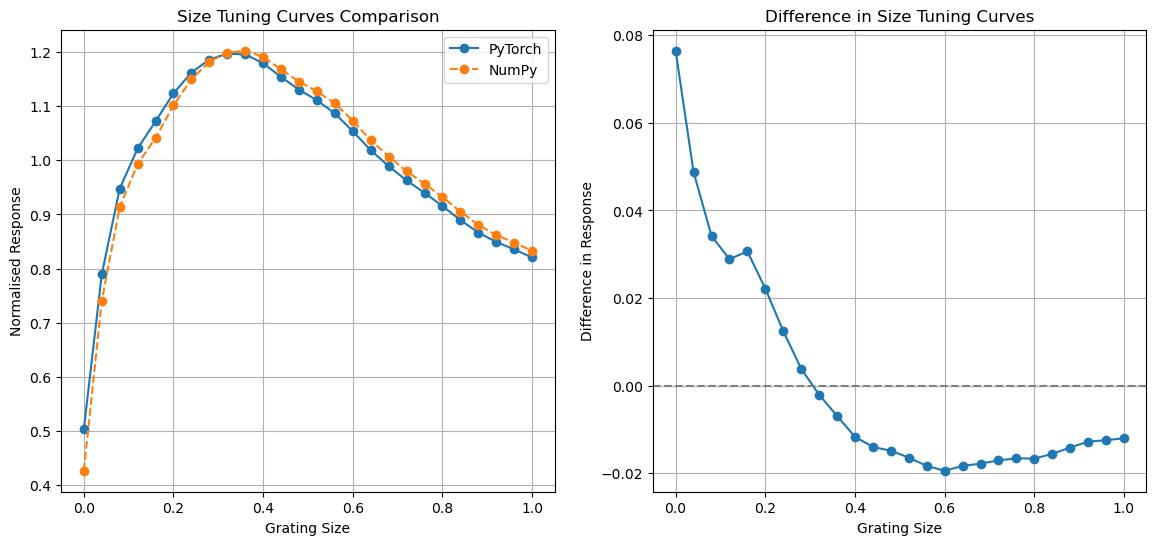

In [16]:
plt.figure(figsize=(14, 6))

# Plotting both PyTorch-based and NumPy-based size tuning curves on the same plot
plt.subplot(1, 2, 1)
plt.plot(sizes, responses.numpy(), marker='o', label='PyTorch')
plt.plot(sizes, responses_np, marker='o', label='NumPy', linestyle='--')
plt.xlabel('Grating Size')
plt.ylabel('Normalised Response')
plt.title('Size Tuning Curves Comparison')
plt.grid(True)
plt.legend()

# Plotting the difference between the curves
plt.subplot(1, 2, 2)
plt.plot(sizes, responses.numpy() - responses_np, marker='o')
plt.xlabel('Grating Size')
plt.ylabel('Difference in Response')
plt.title('Difference in Size Tuning Curves')
plt.grid(True)
plt.axhline(0, color='grey', linestyle='--')  # Zero line for reference